In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


import os
import glob as gb
import cv2
import tensorflow as tf
import keras

In [2]:
trainpath = '../input/intel-image-classification/seg_train/'
testpath = '../input/intel-image-classification/seg_test/'
predpath = '../input/intel-image-classification/seg_pred/'

In [3]:
for folder in  os.listdir(trainpath + 'seg_train') : 
    files = gb.glob(pathname= str( trainpath +'seg_train//' + folder + '/*.jpg'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 2512 in folder mountain
For training data , found 2382 in folder street
For training data , found 2191 in folder buildings
For training data , found 2274 in folder sea
For training data , found 2271 in folder forest
For training data , found 2404 in folder glacier


In [4]:
size = []
for folder in  os.listdir(trainpath +'seg_train') : 
    files = gb.glob(pathname= str( trainpath +'seg_train//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(150, 150, 3)    13986
(113, 150, 3)        7
(111, 150, 3)        3
(135, 150, 3)        3
(143, 150, 3)        2
(108, 150, 3)        2
(146, 150, 3)        2
(142, 150, 3)        2
(123, 150, 3)        2
(136, 150, 3)        2
(134, 150, 3)        2
(144, 150, 3)        2
(81, 150, 3)         1
(149, 150, 3)        1
(119, 150, 3)        1
(76, 150, 3)         1
(120, 150, 3)        1
(97, 150, 3)         1
(105, 150, 3)        1
(141, 150, 3)        1
(110, 150, 3)        1
(133, 150, 3)        1
(115, 150, 3)        1
(145, 150, 3)        1
(140, 150, 3)        1
(124, 150, 3)        1
(103, 150, 3)        1
(100, 150, 3)        1
(131, 150, 3)        1
(147, 150, 3)        1
(102, 150, 3)        1
dtype: int64

In [5]:
code = {'buildings':0 ,'forest':1,'glacier':2,'mountain':3,'sea':4,'street':5}

def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x    

In [6]:
s=100
X_train = []
y_train = []
for folder in  os.listdir(trainpath +'seg_train') : 
    files = gb.glob(pathname= str( trainpath +'seg_train//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_train.append(list(image_array))
        y_train.append(code[folder])

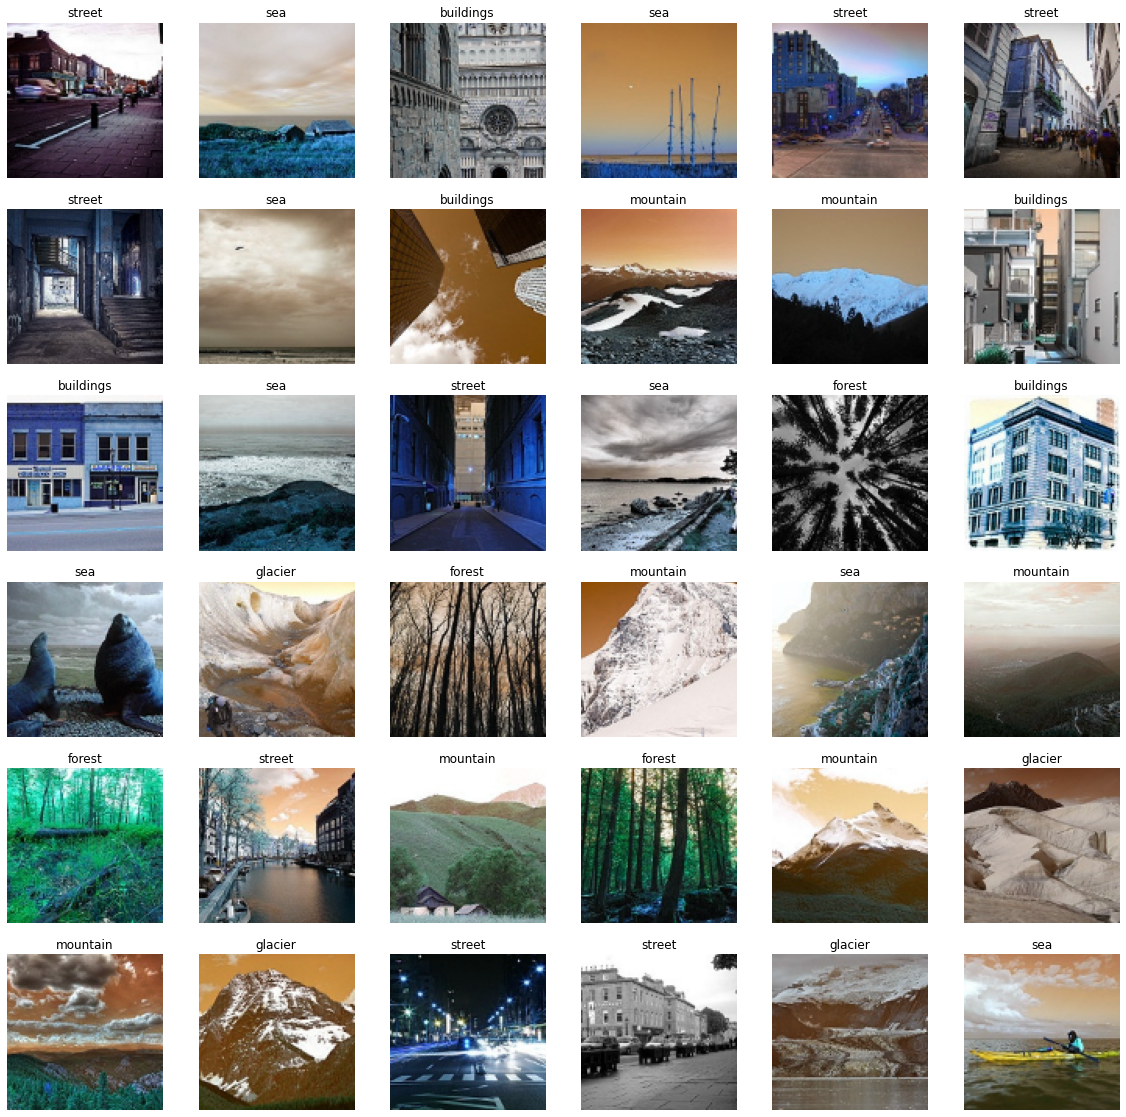

In [7]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title(getcode(y_train[i]))

In [8]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [9]:
print(X_train.shape)


(14034, 100, 100, 3)


In [10]:
KerasModel = keras.models.Sequential([
        keras.layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(s,s,3)),
        keras.layers.Conv2D(150,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Conv2D(120,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(80,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(50,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Flatten() ,    
        keras.layers.Dense(120,activation='relu') ,    
        keras.layers.Dense(100,activation='relu') ,    
        keras.layers.Dense(50,activation='relu') ,        
        keras.layers.Dropout(rate=0.5) ,            
        keras.layers.Dense(6,activation='softmax') ,    
        ])

2022-12-25 16:00:15.987612: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [11]:
KerasModel.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [12]:
print(KerasModel.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 200)       5600      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 150)       270150    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 150)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 120)       162120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 80)        86480     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 18, 50)        36050     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 50)          0

In [13]:
epochs = 5
ThisModel = KerasModel.fit(X_train, y_train, epochs=epochs,batch_size=64,verbose=1)

2022-12-25 16:00:17.486718: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
220/220 [==============================] - 3170s 14s/step - loss: 1.5501 - accuracy: 0.3861
Epoch 2/5
220/220 [==============================] - 3190s 15s/step - loss: 1.1254 - accuracy: 0.5428
Epoch 3/5
220/220 [==============================] - 3172s 14s/step - loss: 0.9875 - accuracy: 0.5988
Epoch 4/5
220/220 [==============================] - 3154s 14s/step - loss: 0.9230 - accuracy: 0.6411
Epoch 5/5
220/220 [==============================] - 3149s 14s/step - loss: 0.8361 - accuracy: 0.6819
